# Introducción al Cómputo Científico con Python

    Dr. Gerardo Tinoco Guerrero
    Dr. Francisco Javier Domínguez Mota
    Universidad Michoacana de San Nicolás de Hidalgo
    XXXI Escuela Nacional de Optimización y Análisis Numérico
    26 al 30 de Juio de 2023

El presente Notebook se realiza únicamente con fines ilustrativos para el curso introductorio de Cómputo Científico con Python.



# Ecuación de Poisson

## Poisson en 1D

A continuación se presentan ejemplos de implementaciones para calcular numéricamente la solución de la ecuación de Poisson en una dimensión espacial.

El problema a resolver es:
\begin{align}
  \frac{\partial^2 \phi}{\partial x^2} = -f
\end{align}

Sujeto a las condiciones:
\begin{align}
  \phi_\Omega = x\cos(x)
\end{align}
y
\begin{align}
  f = 2\sin(x) + x\cos(x)
\end{align}

### Importación de librerias

Primero se hace la importación de las librerías necesarias para trabajar con cuestiones de computación científica en Python.

In [2]:
import numpy as np                                                              # Librería con funciones y arreglos de cómputo numérico.
import matplotlib.pyplot as plt                                                 # Nos permitirá graficar los resultados.

### Condiciones

Se definen las funciones que actuarán como las condiciones del problema. Estas pueden cambiarse dependiendo del problema a modelar con la finalidad de cambiar el problema que se pretende resolver.

En este caso, las funciones que se usarán son:
\begin{align}
  \phi(x) = x\cos(x)
\end{align}
y
\begin{align}
  f(x) = 2\sin(x) + x\cos(x)
\end{align}

In [3]:
def phi(x):                                                                     # Se define la función phi.
    phi = x*np.cos(x)                                                           # Se agrega la expresión para la condición.
    return phi                                                                  # Regresa el valor de la condición.

def f(x):                                                                       # Se define la función phi.
    f = 2*np.sin(x) + x*np.cos(x)                                               # Se agrega la expresión para la condición.
    return f                                                                    # Regresa el valor de la condición.

### Poisson 1D Matricial

#### Inicialización de Variables
Se inicializan algunas variables para la generación de la malla de la región en la cual se pretende resolver el problema.

In [19]:
m      = 11                                                                     # Número de elementos que tendrá la discretización.
x      = np.linspace(0,2*np.pi,m)                                               # Se hace la discretización del intervalo [0, 2pi].
dx     = x[2] - x[1]                                                            # Se calcula h para el método de Diferencias Finitas.
phi_ap = np.zeros([m])                                                          # Se inicializa la variable para la solución aproximada.

#### Condiciones de Frontera
Se establecen las condiciones de frontera del problema. Para esto se evalua la función en los nodos de la frontera.

In [20]:
alpha = phi(x[0])                                                               # Condición de frontera en x_0
beta  = phi(x[-1])                                                              # Condición de frontera en x_m

#### Matrices de Diferencias Finitas

Se ensamblan las matrices para resolver el problema:
  1. Ensamblaremos la matriz tridiagonal A, con los pesos de las diferencias.
  2. Se ensambla la matriz rhs, con la información del lado derecho.

In [21]:
dA   = np.diag(-2*np.ones(m-2))                                                 # Se genera la diagonal principal de la matriz con -2.
dAp1 = np.diag(np.ones((m-2)-1), k = 1)                                         # Se genera la diagonal superior con 1.
dAm1 = np.diag(np.ones((m-2)-1), k = -1)                                        # Se genera la diagonal inferior con 1.
A    = dA + dAp1 + dAm1                                                         # Se ensambla la matriz tridiagonal.
A    = A/dx**2                                                                  # Se dividen todos los valores de la matriz entre dx^2.

In [22]:
rhs       = -f(x[1:m-1])                                                        # Se coloca toda la información del lado deracho en rhs.
rhs[0]   -= alpha/dx**2                                                         # Se agrega la condición de frontera al lado derecho.
rhs[m-3] -= beta/dx**2                                                          # Se agrega la condición de frontera al lado derecho.

#### Resolver el problema
Se resuelve el problema lineal
\begin{align}
    Au = rhs
\end{align}

Además de que se incluyen las condiciones de frontera a la aproximación calculada.

In [23]:
A = np.linalg.pinv(A)                                                           # La inversa nos servirá para multiplicar por el lado derecho.
u = A@rhs                                                                       # Se multiplica la inversa por el lado derecho.

phi_ap[1:m-1] = u                                                               # Se guardan los valores de u, que son la aproximación en los nodos interiores.
phi_ap[0]     = alpha                                                           # Se guarda la condición inicial en la aproximación.
phi_ap[-1]    = beta                                                            # Se guarda la condición inicial en la aproximación.

#### Solución exacta y graficación
Calcularemos la solución exacta, con la finalidad de poder comparar nuestra aproximación y conocer que tan "buena" es la misma.

In [24]:
x2 = np.linspace(0,2*np.pi,200)                                                 # Se crea una malla más fina para la solución exacta.
phi_ex = phi(x2)                                                                # Se calcula la solución exacta.

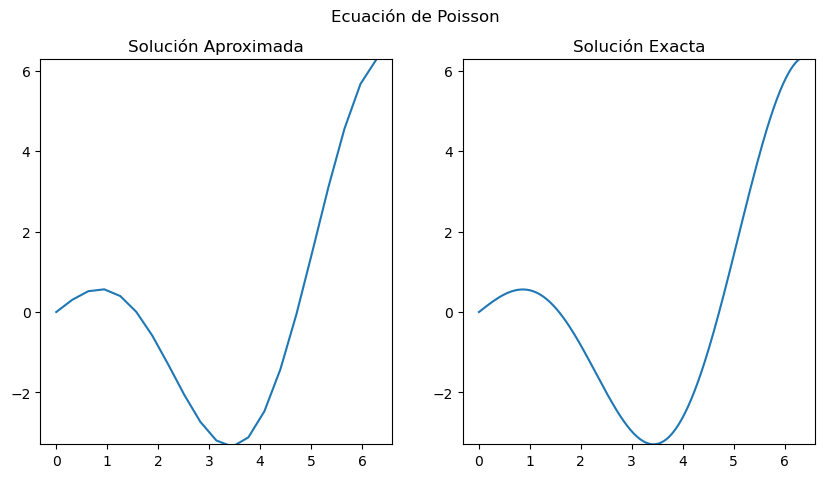

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)                                            # Se hace una figura con dos figuras incrustadas.
plt.rcParams["figure.figsize"] = (10,5)                                         # Se define el tamaño de la figura principal.
plt.suptitle('Ecuación de Poisson')                                             # Se pone un título a la figura principal.
min  = phi_ex.min()                                                             # Se encuentra el valor mínimo de la solución para ajustar la gráfica.
max  = phi_ex.max()                                                             # Se encuentra el valor máximo de la solución para ajustar la gráfica.

ax1.set_title('Solución Aproximada')                                            # Se pone el título de la primera figura incrustada.
ax1.plot(x, phi_ap)                                                             # Se grafica la solución aproximada en la primera figura incrustada.
ax1.set_ylim([min,max])                                                         # Se establecen los ejes de la gráfica.

ax2.set_title('Solución Exacta')                                                # Se pone el título de la segunda figura incrustada.
ax2.plot(x2, phi_ex)                                                            # Se grafica la solución exacta en la segunda figura incrustada.
ax2.set_ylim([min,max])                                                         # Se establecen los ejes de la gráfica.
plt.show()                                                                      # Se muestra la figura.

### Poisson 1D Iterativo

#### Inicialización de Variables
Se inicializan algunas variables para la generación de la malla de la región en la cual se pretende resolver el problema.

In [11]:
m      = 11                                                                     # Número de elementos que tendrá la discretización.
x      = np.linspace(0,2*np.pi,m)                                               # Se hace la discretización del intervalo [0, 2pi].
dx     = x[2] - x[1]                                                            # Se calcula h para el método de Diferencias Finitas.
phi_ap = np.zeros([m])                                                          # Se inicializa la variable para la solución aproximada.
err    = 1                                                                      # Se inicializa una diferencia, err, en 1 para asegurarnos de que haga por lo menos una iteración.
tol    = np.sqrt(np.finfo(float).eps)                                           # Se establece una tolerancia que será la raíz cuadrada del épsilon de la computadora.

#### Condiciones de Frontera
Se establecen las condiciones de frontera del problema. Para esto se evalua la función en los nodos de la frontera.

In [12]:
phi_ap[0]  = phi(x[0])                                                          # Condición de frontera en x_0
phi_ap[-1] = phi(x[-1])                                                         # Condición de frontera en x_m

#### Resolver el problema
En este caso, el problema se resolverá iterativamente, tomando en cuenta la tolerancia para el error cometido de itación en interación establecida anteriormente.

In [13]:
while err >= tol:                                                               # Mientras que la diferencia sea más grande que la tolerancia.
    err = 0                                                                     # Se escribe la diferencia como 0.
    for i in range(1,m-2):                                                      # Para cada uno de los nodos interiores.
        t   = (1/2)*(phi_ap[i-1] + phi_ap[i+1] + dx**2*f(x[i]))                 # Se calcula la aproximación en el nodo.
        err = max(err, abs(t - phi_ap[i]))                                      # Se guarda la diferencia máxima entre la predicción y la solución nueva.
        phi_ap[i] = t                                                           # Se gurda el valor calculado de la solución.

#### Solución exacta y graficación
Calcularemos la solución exacta, con la finalidad de poder comparar nuestra aproximación y conocer que tan "buena" es la misma.

In [16]:
x2 = np.linspace(0,2*np.pi,200)                                                 # Se crea una malla más fina para la solución exacta.
phi_ex = phi(x2)                                                                # Se calcula la solución exacta.

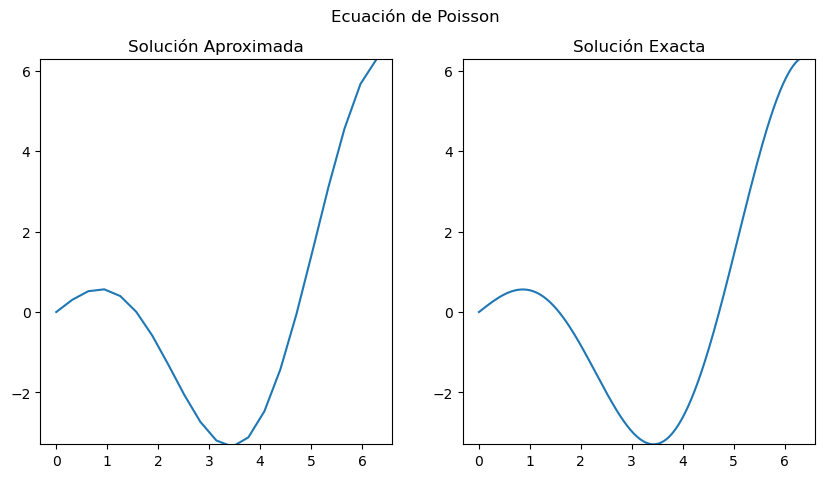

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)                                            # Se hace una figura con dos figuras incrustadas.
plt.rcParams["figure.figsize"] = (10,5)                                         # Se define el tamaño de la figura principal.
plt.suptitle('Ecuación de Poisson')                                             # Se pone un título a la figura principal.
min  = phi_ex.min()                                                             # Se encuentra el valor mínimo de la solución para ajustar la gráfica.
max  = phi_ex.max()                                                             # Se encuentra el valor máximo de la solución para ajustar la gráfica.

ax1.set_title('Solución Aproximada')                                            # Se pone el título de la primera figura incrustada.
ax1.plot(x, phi_ap)                                                             # Se grafica la solución aproximada en la primera figura incrustada.
ax1.set_ylim([min,max])                                                         # Se establecen los ejes de la gráfica.

ax2.set_title('Solución Exacta')                                                # Se pone el título de la segunda figura incrustada.
ax2.plot(x2, phi_ex)                                                            # Se grafica la solución exacta en la segunda figura incrustada.
ax2.set_ylim([min,max])                                                         # Se establecen los ejes de la gráfica.
plt.show()                                                                      # Se muestra la figura.

## Poisson en 2D

A continuación se presentan ejemplos de implementaciones para calcular numericamente la solución de la ecuación de Poisson en dos dimensiones espaciales.

El problema a resolver es
\begin{align}
    \frac{\partial^2\phi}{\partial x^2}+ \frac{\partial^2\phi}{\partial y^2} = -f
\end{align}

Sujeto a las condiciones:
\begin{align}
    \phi_\Omega = 2e^{2x+y}
\end{align}
y
\begin{align}
    f = 10e^{2x+y}
\end{align}

### Importación de librerias

Primero se hace la importación de las librerías necesarias para trabajar con cuestiones de computación científica en Python.

In [1]:
import numpy as np                                                              # Librería con funciones y arreglos de cómputo numérico.
import matplotlib.pyplot as plt                                                 # Nos permitirá graficar los resultados

### Funciones para las condiciones
Se definen las funciones que actuarán como las condiciones del problema frontera.

Estas pueden cambiarse dependiendo del problema a modelar con la finalidad de cambiar el problema que se pretende resolver.

En este caso, las funciones que se usarán son:
\begin{align}
    \phi(x,y) = 2e^{2x+y}
\end{align}
y
\begin{align}
    f(x,y) = 10e^{2x+y}
\end{align}

In [2]:
def phi(x, y):                                                                  # Se define la función phi.
    phi = 2*np.exp(2*x+y)                                                       # Se agrega la expresión para la condición.
    return phi                                                                  # Regresa el valor de la condición evaluada.

def f(x,y):                                                                     # Se define la función f.
    f = 10*np.exp(2*x+y)                                                        # Se agrega la expresión para la condición.
    return f                                                                    # Regresa el valor de la condición evaluada.

### Poisson 2D Matricial

#### Inicialización de Variables
Se inicializan algunas variables para la generación de la malla de la región en la cual se pretende resolver el problema y acelerar algunos cálculos.

In [28]:
m      = 21                                                                     # Número de elementos que tendrá la discretización.
x      = np.linspace(0,1,m)                                                     # Se hace la discretización en x del intervalo [0, 1].
y      = np.linspace(0,1,m)                                                     # Se hace la discretización en y del intervalo [0, 1].
h      = x[2] - x[1]                                                            # Se calcula h para el método de Diferencias Finitas.
x, y   = np.meshgrid(x,y)                                                       # Se hace la malla de la región para trabajar [0,1]x[0,1].
A      = np.zeros([(m-2)*(m-2),(m-2)*(m-2)])                                    # Se inicializa la matriz A con ceros.
rhs    = np.zeros([(m-2)*(m-2),1])                                              # Se inicializa el vector rhs con ceros.
phi_ap = np.zeros([m,m])                                                        # Se inicializa la variable para la solución aproximada.
phi_ex = np.zeros([m,m])                                                        # Se inicializa la respectiva variable con ceros.

#### Condiciones de Frontera

Se deben de agregar las condiciones de frontera, para poder calcular correctamente la aproximación. En este caso, se debe de considerar que se tienen 4 fronteras diferentes.

In [29]:
for i in range(1,m-1):                                                          # Se recorren los nodos de la frontera.
    temp       = i-1                                                            # Se asigna el valor de temp como los nodos de la primera frontera en x.
    rhs[temp] += phi(x[i,0], y[i,0])                                            # Se guarda la condición de frontera en el lado derecho.
    temp       = (i-1) + (m-2)*((m-1)-2)                                        # Se asigna el valor de temp como los nodos de la última frontera en x.
    rhs[temp] += phi(x[i,m-1], y[i,m-1])                                        # Se guarda la condición de frontera en el lado derecho.
    temp       = (m-2)*(i-1)                                                    # Se asigna el valor de temp para los nodos de la primera frontera en y.
    rhs[temp] += phi(x[0,i], y[0,i])                                            # Se guarda la condición de frontera en el lado derecho.
    temp       = ((m-1)-2) + (m-2)*(i-1)                                        # Se asgina el valor de temp para los nodos de la última frontera en y.
    rhs[temp] += phi(x[m-1,i], y[m-1,i])                                        # Se guarda la condición de frontera en el lado derecho.

for i in range(1,m-1):                                                          # Para todos los nodos en x.
    for j in range(1,m-2):                                                      # Para todos los nodos en y.
        temp       = (i-1) + (m-2)*(j-1)                                        # Se buscan los nodos que son frontera.
        rhs[temp] += -(h**2)*f(x[i,j], y[i,j])                                  # Se agrega f al lado derecho.

#### Matriz de Diferencias Finitas
Se ensambla la Matriz A, tridiagonal por bloques, de Diferencias Finitas.

In [30]:
dB   = np.diag(4*np.ones(m-2))                                                  # Se hace una matriz diagonal con 4s.
dBp1 = np.diag(1*np.ones((m-2)-1), k=1)                                         # Se hace una matriz identidad negativa inferior.
dBm1 = np.diag(1*np.ones((m-2)-1), k=-1)                                        # Se hace una matriz identidad negativa superior.
B    = (dB - dBp1 - dBm1)                                                       # Se ensamblan los bloques de la diagonal.
I    = -np.identity(m-2)                                                        # Se hace una matriz identidad negativa.
temp = 1                                                                        # Se inicializa un contador para guardar lo anterior en la matriz A.

for i in range(0,(m-2)*(m-2),(m-2)):                                            # Para cada uno de los bloques.
    A[i:temp*(m-2), i:temp*(m-2)] = B                                           # Se hace la diagonal interior de bloques B.
    if temp*(m-2) < (m-2)*(m-2):                                                # Si estamos arriba o abajo de la diagonal interior.
        A[temp*(m-2):temp*(m-2)+(m-2), i:temp*(m-2)] = I                        # Se pone una identidad negativa en la diagonal superior.
        A[i:temp*(m-2), temp*(m-2):temp*(m-2)+(m-2)] = I                        # Se pone una identidad negativa en la diagonal inferior.
    temp += 1                                                                   # Se aumenta el contador.

#### Resolver el problema
Se resuelve el problema lineal
\begin{align}
    Au = rhs
\end{align}

Además de que se agregan las condiciones de frontera a la aproximación calculada.

In [31]:
A  = np.linalg.pinv(A)                                                          # La inversa nos servirá para multiplicar por el lado derecho.
u = A@rhs                                                                       # Se multiplica la inversa por el lado derecho.
u = np.reshape(u, (m-2,m-2)).transpose()                                        # Se convierte el vector columna en matriz.

phi_ap[1:(m-1), 1:(m-1)] = u                                                    # Se guarda la aproximación calculada dentro de phi_ap.
for i in range(m):                                                              # Para todos los nodos.
    phi_ap[i,0] = phi(x[i,0],y[i,0])                                            # Se guarda la condición de frontera x = 0 en la aproximación.
    phi_ap[i,m-1] = phi(x[i,m-1],y[i,m-1])                                      # Se guarda la condición de frontera x = m en la aproximación.
    phi_ap[0,i] = phi(x[0,i],y[0,i])                                            # Se guarda la condición de frontera y = 0 en la aproximación.
    phi_ap[m-1,i] = phi(x[m-1,i],y[m-1,i])                                      # Se guarda la condición de frontera y = m en la aproximación.

#### Solución Exacta
Se hace el cálculo de la solución exacta. En este caso, el problema toma como condiciones de frontera la solución exacta $\phi$.

In [32]:
for i in range(m):                                                              # Para cada uno de los elementos de la discretización en x.
    for j in range(m):                                                          # Para cada uno de los elementos de la discretización en y.
        phi_ex[i,j] = phi(x[i,j], y[i,j])                                       # Se asigna la solución exacta.

#### Graficación
Se grafican la solución aproximada y la solución exacta lado a lado para ver que tan buena (o mala) es la aproximación.

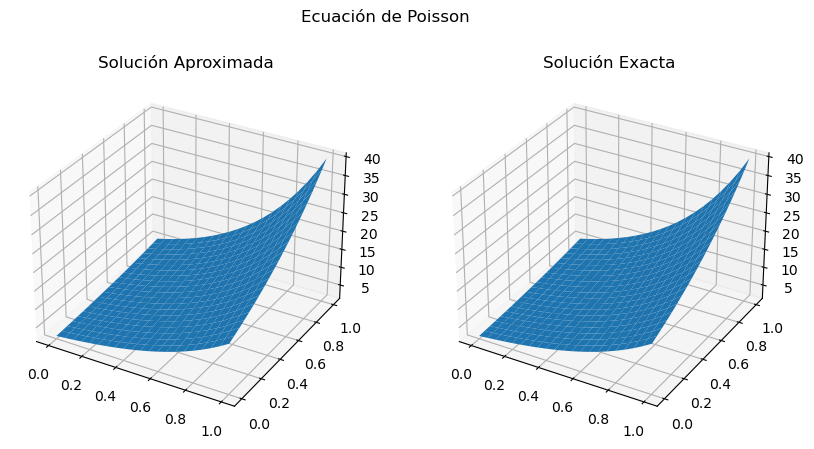

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={"projection": "3d"})           # Se hace una figura con dos figuras incrustadas.
plt.rcParams["figure.figsize"] = (10,5)                                         # Se define el tamaño de la figura principal.
plt.suptitle('Ecuación de Poisson')                                             # Se pone un título a la figura principal.
min  = phi_ex.min()                                                             # Se encuentra el valor mínimo de la solución para ajustar la gráfica.
max  = phi_ex.max()                                                             # Se encuentra el valor máximo de la solución para ajustar la gráfica.

ax1.set_title('Solución Aproximada')                                            # Se pone el título de la primera figura incrustada.
ax1.plot_surface(x, y, phi_ap)                                                  # Se grafica la solución aproximada en la primera figura incrustada.
ax1.set_zlim([min,max])                                                         # Se establecen los ejes de la gráfica.

ax2.set_title('Solución Exacta')                                                # Se pone el título de la segunda figura incrustada.
ax2.plot_surface(x, y, phi_ex)                                                  # Se grafica la solución exacta en la segunda figura incrustada.
ax2.set_zlim([min,max])                                                         # Se establecen los ejes de la gráfica.
plt.show()                                                                      # Se muestra la figura.

### Poisson 2D Iterativo

#### Inicialización de Variables
Se inicializan algunas variables para la generación de la malla de la región en la cual se pretende resolver el problema y acelerar algunos cálculos.

In [3]:
m      = 21                                                                     # Número de elementos que tendrá la discretización.
x      = np.linspace(0,1,m)                                                     # Se hace la discretización en x del intervalo [0, 1].
y      = np.linspace(0,1,m)                                                     # Se hace la discretización en y del intervalo [0, 1].
h      = x[2] - x[1]                                                            # Se calcula h para el método de Diferencias Finitas.
x, y   = np.meshgrid(x,y)                                                       # Se hace la malla de la región para trabajar [0,1]x[0,1].
err    = 1                                                                      # Se inicializa una diferencia, err, en 1 para asegurarnos de que haga por lo menos una iteración.
tol    = np.sqrt(np.finfo(float).eps)                                           # Se establece una tolerancia que será la raíz cuadrada del épsilon de la computadora.
phi_ap = np.zeros([m,m])                                                        # Se inicializa la variable para la solución aproximada.
phi_ex = np.zeros([m,m])                                                        # Se inicializa la respectiva variable con ceros.

#### Condiciones de Frontera

Se deben de agregar las condiciones de frontera, para poder calcular correctamente la aproximación. En este caso, se debe de considerar que se tienen 4 fronteras diferentes.

In [4]:
for i in range(m):                                                              # Se recorren todos los nodos de frontera.
    phi_ap[i,0]  = phi(x[i,0], y[i,0])                                          # Se asigna el valor para la frontera derecha
    phi_ap[i,-1] = phi(x[i,-1], y[i,-1])                                        # Se asigna el valor para la frontera izquierda
    phi_ap[0,i]  = phi(x[0,i], y[0,i])                                          # Se asigna el valor para la frontera superior
    phi_ap[-1,i] = phi(x[-1,i], y[-1,i])                                        # Se asigna el valor para la frontera inferior

#### Resolver el problema
En este caso, el problema se resolverá iterativamente, tomando en cuenta la tolerancia para el error cometido de itación en interación establecida anteriormente.

In [5]:
while err >= tol:
    err = 0
    for i in range(1,m-1):
        for j in range(1,m-1):
            t = (1/4)*(phi_ap[i-1,j] + phi_ap[i+1,j] + \
                phi_ap[i,j-1] + phi_ap[i,j+1] - \
                h**2*f(x[i,j],y[i,j]))
            err = max(err, abs(t - phi_ap[i,j]))
            phi_ap[i,j] = t

#### Solución Exacta
Se hace el cálculo de la solución exacta. En este caso, el problema toma como condiciones de frontera la solución exacta $\phi$.

In [6]:
for i in range(m):                                                              # Para cada uno de los elementos de la discretización en x.
    for j in range(m):                                                          # Para cada uno de los elementos de la discretización en y.
        phi_ex[i,j] = phi(x[i,j], y[i,j])                                       # Se asigna la solución exacta.

#### Graficación
Se grafican la solución aproximada y la solución exacta lado a lado para ver que tan buena (o mala) es la aproximación.

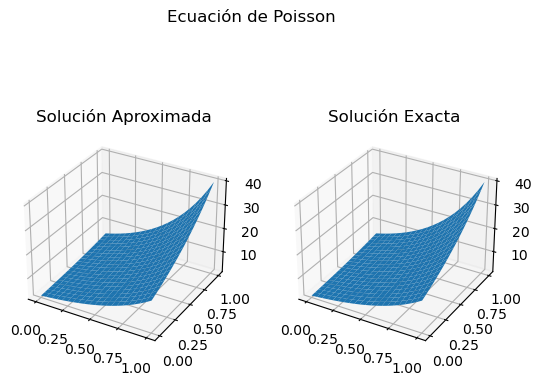

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={"projection": "3d"})           # Se hace una figura con dos figuras incrustadas.
plt.rcParams["figure.figsize"] = (10,5)                                         # Se define el tamaño de la figura principal.
plt.suptitle('Ecuación de Poisson')                                             # Se pone un título a la figura principal.
min  = phi_ex.min()                                                             # Se encuentra el valor mínimo de la solución para ajustar la gráfica.
max  = phi_ex.max()                                                             # Se encuentra el valor máximo de la solución para ajustar la gráfica.

ax1.set_title('Solución Aproximada')                                            # Se pone el título de la primera figura incrustada.
ax1.plot_surface(x, y, phi_ap)                                                  # Se grafica la solución aproximada en la primera figura incrustada.
ax1.set_zlim([min,max])                                                         # Se establecen los ejes de la gráfica.

ax2.set_title('Solución Exacta')                                                # Se pone el título de la segunda figura incrustada.
ax2.plot_surface(x, y, phi_ex)                                                  # Se grafica la solución exacta en la segunda figura incrustada.
ax2.set_zlim([min,max])                                                         # Se establecen los ejes de la gráfica.
plt.show()                                                                      # Se muestra la figura.

# Ecuación de Advección

##Advección en 1D

A continuación se presentan ejemplos de implementaciones para calcular numéricamente la solución de la ecuación de Advección en una dimensión espacial.

El problema a resolver es:
\begin{align}
  \frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0
\end{align}

Sujeto a las condiciones:
\begin{align}
  u_\Omega = sin(x-at)
\end{align}
y
\begin{align}
  u\mid_{t = 0} = sin(x)
\end{align}

### Importación de librerias

Primero se hace la importación de las librerías necesarias para trabajar con cuestiones de computación científica en Python.

In [19]:
import numpy as np                                                              # Librería con funciones y arreglos de cómputo numérico.
import matplotlib.pyplot as plt                                                 # Nos permitirá graficar los resultados.

### Condiciones

Se define la función con las condiciones del problema, en este caso, se usará la misma función como condición inicial y condición de frontera.

En este caso, las función que se usará es:
\begin{align}
  u(x,t) = sin(x-at)
\end{align}


In [20]:
def u(x,t,a):                                                                   # Se define la función u.
    u = np.sin(x - a*t)                                                         # Se agrega la expresión para la condición.
    return u                                                                    # Regresa el valor de la condición.

### Inicialización de Variables
Se inicializan algunas variables para la generación de la malla de la región en la cual se pretende resolver el problema.

In [21]:
m    = 11                                                                       # Número de elementos que tendrá la discretización.
t    = 100                                                                      # Número de pasos en el tiempo.
a    = 0.2                                                                      # Velocidad de transporte.

x    = np.linspace(0,np.pi,m)                                                   # Se hace la discretización del intervalo [0, 2pi].
T    = np.linspace(0,1,t)                                                       # Se hace la discretización temporal del intervalo [0,1]
dx   = x[1] - x[0]                                                              # Se calcula dx para el método de Diferencias Finitas.
dt   = T[1] - T[0]                                                              # Se calcula dt para el método de Diferencias Finitas.
u_ap = np.zeros([m,t])                                                          # Se inicializa la variable para la solución aproximada.

### FTBS (Forward Time Backward Space)

#### Condiciones Iniciales y de Frontera
Se establecen las condiciones iniciales y de frontera del problema.

In [22]:
for i in range(m):                                                              # Para cada uno de los nodos.
    u_ap[i,0] = u(x[i], T[0], a)                                                # Se asigna la condición inicial.

for k in range(t):                                                              # Para cada paso de tiempo.
    u_ap[0,k] = u(x[0], T[k], a)                                                # Se agrega la condición de frontera.

#### Solución por medio de FTBS
Se resuelve el problema de advección usando un esquema FTBS

In [23]:
for k in range(1, t):                                                           # Para todos los pasos de tiempo.
    for i in range(1,m):                                                        # Para todos los nodos.
        u_ap[i,k] = u_ap[i,k-1] - a*(dt/dx)*(u_ap[i,k-1] - u_ap[i-1,k-1])       # Se calcula la aproximación.

#### Solución exacta y graficación
Calculamoss la solución exacta, con la finalidad de poder comparar nuestra aproximación.

In [26]:
u_ex = np.zeros([200,t])                                                        # Se inicializa u_ex para guardar la solución exacta.
x2   = np.linspace(0,np.pi,200)                                                 # Se hace una malla "fina" para mostrar mejor la solución.
for k in range(t):                                                              # Para todos los tiempos.
    for i in range(200):                                                        # Para todos los nodos.
        u_ex[i,k] = u(x2[i], T[k], a)                                           # Se guarda la solución exacta.

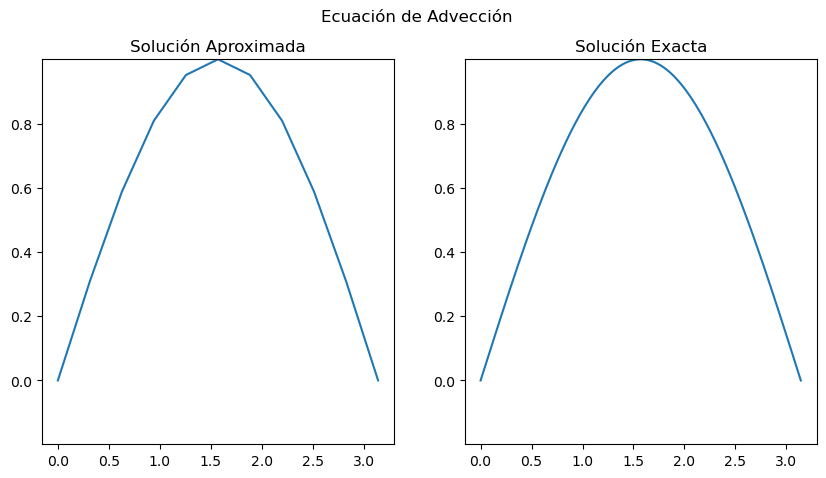

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)                                            # Se hace una figura con dos figuras incrustadas.
plt.rcParams["figure.figsize"] = (10,5)                                         # Se define el tamaño de la figura principal.
plt.suptitle('Ecuación de Advección')                                           # Se pone un título a la figura principal.
min  = u_ex.min()                                                               # Se encuentra el valor mínimo de la solución.
max  = u_ex.max()                                                               # Se encuentra el valor máximo de la solución.
p = int(np.ceil(t/100))                                                         # Se decide cuantos pasos de tiempo mostrar.

for i in range(0,t,p):                                                          # Para el tiempo desde 0 hasta 1.
    ax1.plot(x, u_ap[:,i])                                                      # Se grafica la solución aproximada en la primera figura incrustada.
    ax1.set_ylim([min,max])                                                     # Se fijan los ejes en y.
    ax1.set_title('Solución Aproximada')                                        # Se pone el título de la primera figura incrustada.
    
    ax2.plot(x2, u_ex[:,i])                                                     # Se grafica la solución exacta en la segunda figura incrustada.
    ax2.set_ylim([min,max])                                                     # Se fijan los ejes en y.
    ax2.set_title('Solución Exacta')                                            # Se pone el título de la segunda figura incrustada.
    
    plt.pause(0.01)                                                             # Se muestra la figura.
    ax1.clear()                                                                 # Se limpia la gráfica de la primera figura.
    ax2.clear()                                                                 # Se limpia la gráfica de la segunda figura.

plt.show()                                                                      # Se muestra el último paso de tiempo.

### FTCS (Forward Time Center Space)

#### Condiciones Iniciales y de Frontera
Se establecen las condiciones iniciales y de frontera del problema.

In [ ]:
for i in range(m):                                                              # Para cada uno de los nodos.
    u_ap[i,0] = u(x[i], T[0], a)                                                # Se asigna la condición inicial.

for k in range(t):                                                              # Para cada paso de tiempo.
    u_ap[0,k] = u(x[0], T[k], a)                                                # Se agrega la condición de frontera.

#### Solución por medio de FTCS
Se resuelve el problema de advección usando un esquema FTCS

In [ ]:
for k in range(1, t):                                                           # Para todos los pasos de tiempo.
    for i in range(1,m-1):                                                      # Para todos los nodos.
        u_ap[i,k] = u_ap[i,k-1] - a*dt/(2*dx)*(u_ap[i+1,k-1] - u_ap[i-1,k-1])   # Se calcula la aproximación.

#### Solución exacta y graficación
Calculamoss la solución exacta, con la finalidad de poder comparar nuestra aproximación.

In [ ]:
u_ex = np.zeros([200,t])                                                        # Se inicializa u_ex para guardar la solución exacta.
x2   = np.linspace(0,np.pi,200)                                                 # Se hace una malla "fina" para mostrar mejor la solución.
for k in range(t):                                                              # Para todos los tiempos.
    for i in range(200):                                                        # Para todos los nodos.
        u_ex[i,k] = u(x2[i], T[k], a)                                           # Se guarda la solución exacta.

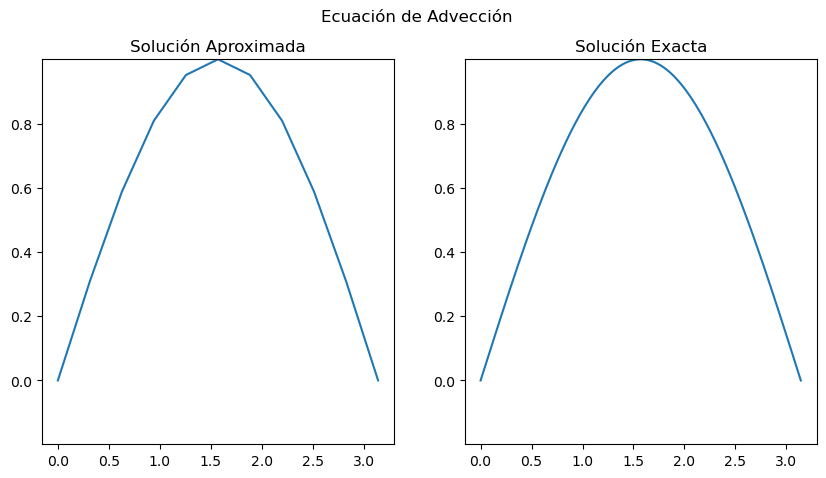

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)                                            # Se hace una figura con dos figuras incrustadas.
plt.rcParams["figure.figsize"] = (10,5)                                         # Se define el tamaño de la figura principal.
plt.suptitle('Ecuación de Advección')                                           # Se pone un título a la figura principal.
min  = u_ex.min()                                                               # Se encuentra el valor mínimo de la solución.
max  = u_ex.max()                                                               # Se encuentra el valor máximo de la solución.
p = int(np.ceil(t/100))                                                         # Se decide cuantos pasos de tiempo mostrar.

for i in range(0,t,p):                                                          # Para el tiempo desde 0 hasta 1.
    ax1.plot(x, u_ap[:,i])                                                      # Se grafica la solución aproximada en la primera figura incrustada.
    ax1.set_ylim([min,max])                                                     # Se fijan los ejes en y.
    ax1.set_title('Solución Aproximada')                                        # Se pone el título de la primera figura incrustada.
    
    ax2.plot(x2, u_ex[:,i])                                                     # Se grafica la solución exacta en la segunda figura incrustada.
    ax2.set_ylim([min,max])                                                     # Se fijan los ejes en y.
    ax2.set_title('Solución Exacta')                                            # Se pone el título de la segunda figura incrustada.
    
    plt.pause(0.01)                                                             # Se muestra la figura.
    ax1.clear()                                                                 # Se limpia la gráfica de la primera figura.
    ax2.clear()                                                                 # Se limpia la gráfica de la segunda figura.

plt.show()                                                                      # Se muestra el último paso de tiempo.

# Ecuación de Difusión

# Ecuación de Advección-Difusión